# Multiple Linear Regression Power Consumed

In [1]:
%reset
import pandas as pd
import numpy as np

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


Power consumption in factory.

In [3]:
power=pd.read_csv('PowerConsumed.csv')
power

,PowerCons,AmbTemp,RunDays,Purity,Produce
0,240,25,24,91,100
1,236,31,21,90,95
2,270,45,24,88,110
3,274,60,25,87,88
4,301,65,25,91,94
5,316,72,26,94,99
6,300,80,25,87,97
7,296,84,25,86,96
8,267,75,24,88,110
9,276,60,25,91,105


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

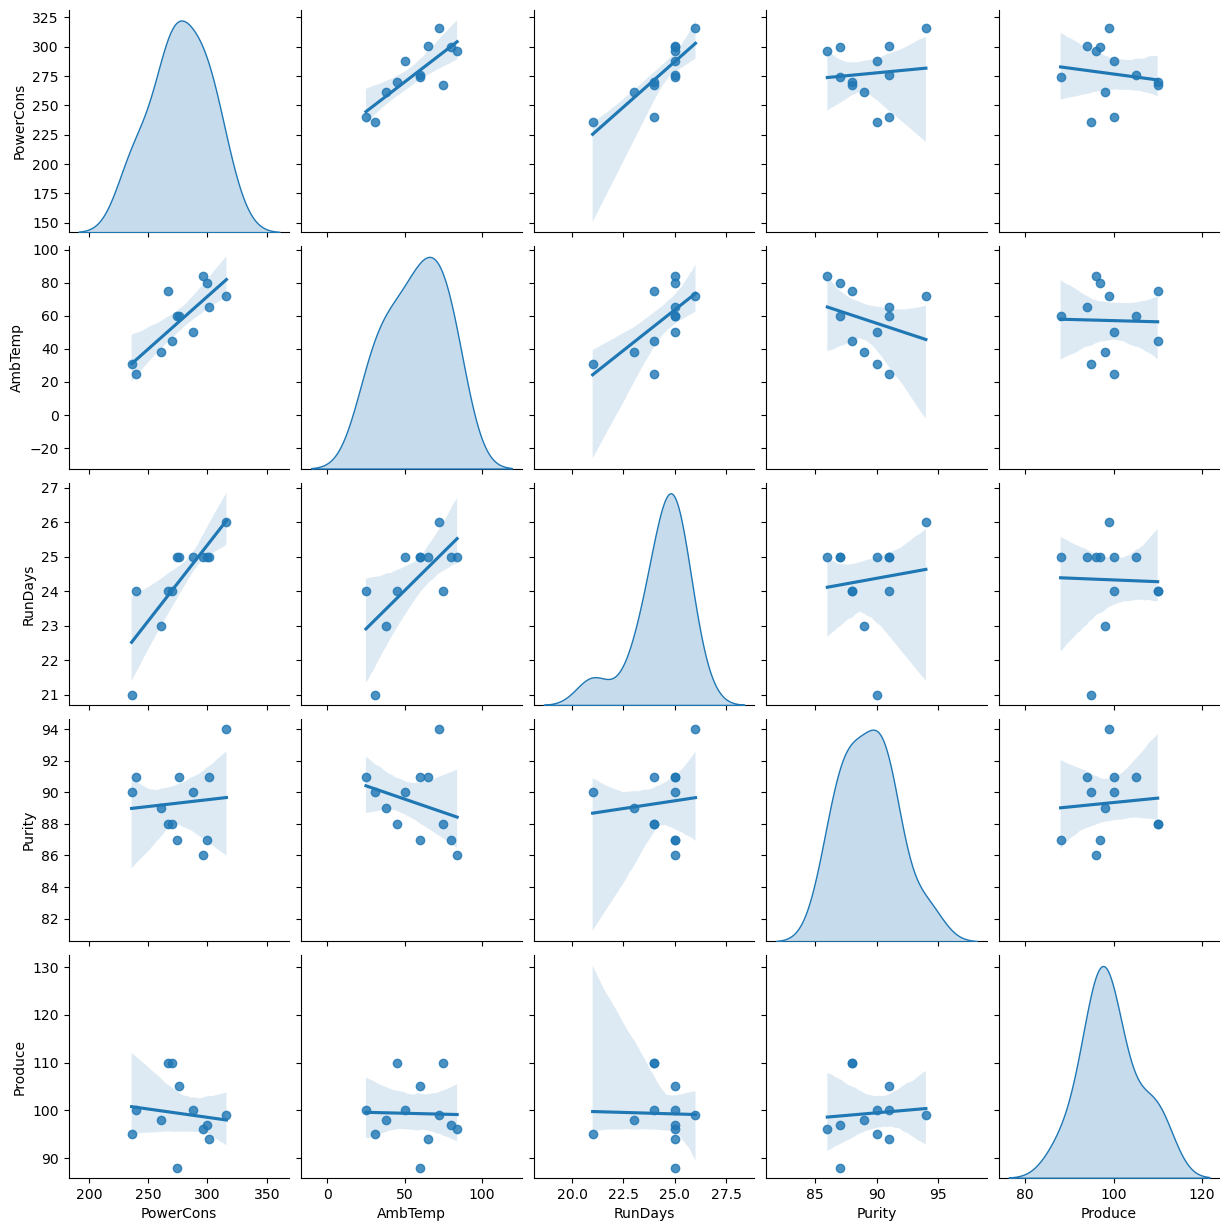

In [15]:
sns.pairplot(data=power,kind='reg',diag_kind='kde')
plt.show()

In [17]:
from statsmodels.formula.api import ols

model0=ols('PowerCons~AmbTemp',data=power)
results0=model0.fit()
print(results0.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.608   
Dependent Variable: PowerCons        AIC:                101.3280
Date:               2023-03-16 09:07 BIC:                102.2978
No. Observations:   12               Log-Likelihood:     -48.664 
Df Model:           1                F-statistic:        18.10   
Df Residuals:       10               Prob (F-statistic): 0.00168 
R-squared:          0.644            Scale:              233.95  
------------------------------------------------------------------
            Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
Intercept  219.3800   14.2655  15.3784  0.0000  187.5945  251.1655
AmbTemp      1.0109    0.2376   4.2539  0.0017    0.4814    1.5403
-----------------------------------------------------------------
Omnibus:               0.108        Durbin-Watson:          1.496
Prob(Omnibus):        

C:\Users\carol\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [54]:
model1=ols('PowerCons~AmbTemp+RunDays',data=power)
results1=model1.fit()
print(results1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.756   
Dependent Variable: PowerCons        AIC:                96.3845 
Date:               2023-03-16 09:23 BIC:                97.8392 
No. Observations:   12               Log-Likelihood:     -45.192 
Df Model:           2                F-statistic:        18.05   
Df Residuals:       9                Prob (F-statistic): 0.000708
R-squared:          0.800            Scale:              145.74  
------------------------------------------------------------------
             Coef.   Std.Err.    t     P>|t|     [0.025    0.975] 
------------------------------------------------------------------
Intercept    3.9164   81.9126  0.0478  0.9629  -181.3828  189.2156
AmbTemp      0.5727    0.2498  2.2929  0.0475     0.0077    1.1378
RunDays      9.8824    3.7213  2.6556  0.0262     1.4642   18.3007
-----------------------------------------------------------------
Omnibus:             

C:\Users\carol\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [55]:
from statsmodels.stats.anova import anova_lm
anova_results1 = anova_lm(results1)
print(anova_results1)

           df       sum_sq      mean_sq          F    PR(>F)
AmbTemp   1.0  4233.405453  4233.405453  29.047036  0.000439
RunDays   1.0  1027.823217  1027.823217   7.052294  0.026234
Residual  9.0  1311.687996   145.743111        NaN       NaN


Text(0.5, 0.5, 'RunDays')

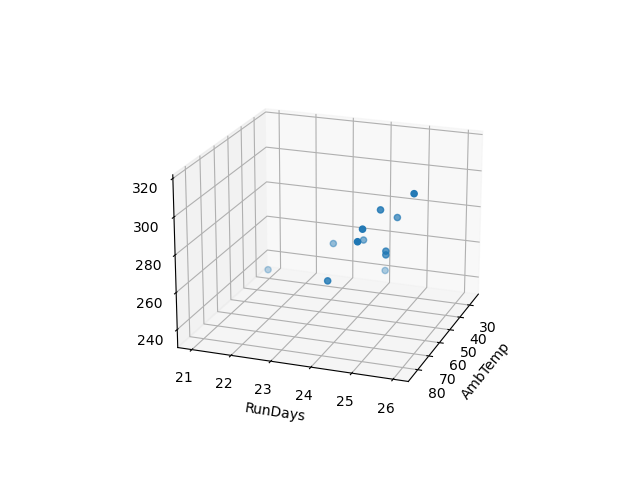

In [56]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

x=power['AmbTemp']
y=power['RunDays']
z=power['PowerCons']

ax.scatter(x,y,z)
ax.view_init(elev=20.,azim=20)
plt.xlabel("AmbTemp")
plt.ylabel("RunDays")

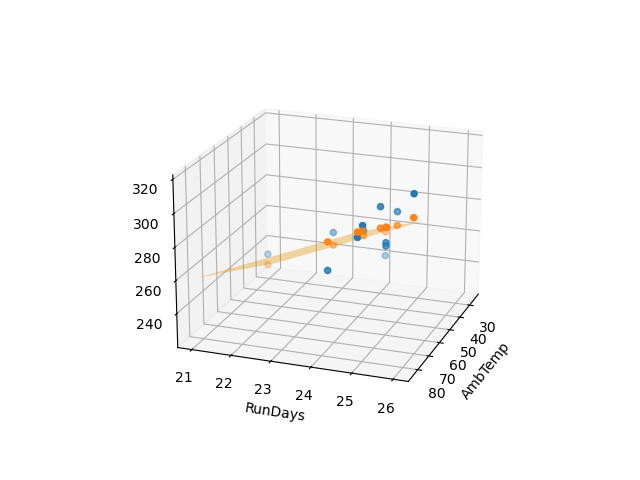

In [58]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

xSP=power['AmbTemp']
ySP=power['RunDays']
zSP=power['PowerCons']
plt.xlabel("AmbTemp")
plt.ylabel("RunDays")

ax.scatter(xSP,ySP,zSP)
ax.view_init(elev=20,azim=20)

ax.scatter(xSP.values,ySP.values,results1.fittedvalues.values)

x1SP,y1SP=model1.exog_names[1:]

x_surfSP=np.arange(power['AmbTemp'].min(), power['AmbTemp'].max())
y_surfSP=np.arange(power['RunDays'].min(), power['RunDays'].max())
xSSP,ySSP=np.meshgrid(x_surfSP,y_surfSP)

exog=pd.DataFrame({x1SP: xSSP.ravel(), y1SP:ySSP.ravel()})
zSSP=results1.predict(exog=exog).values.reshape(xSSP.shape)
ax.plot_surface(xSSP,ySSP,zSSP,alpha=0.4,color='orange')

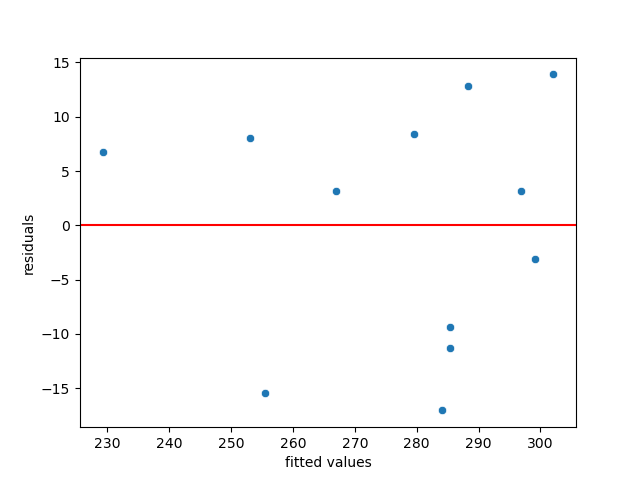

In [59]:
fig=plt.figure()
ax=fig.add_subplot(111)

sns.scatterplot(x=results1.fittedvalues,y=results1.resid)
plt.xlabel("fitted values")
plt.ylabel("residuals")
plt.axhline(0,color="red")

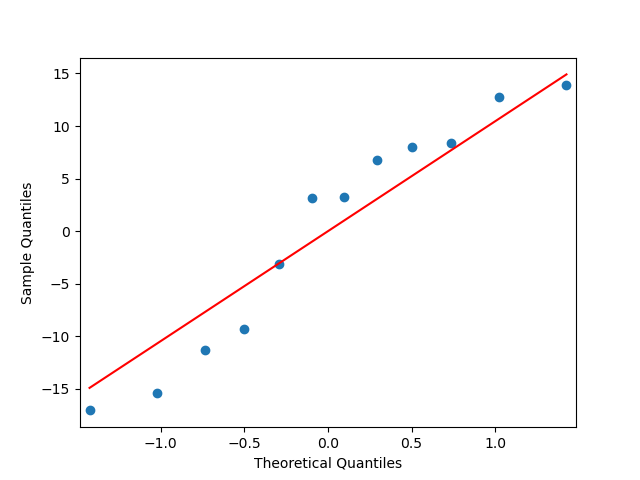

In [60]:
import statsmodels.api as sm
sm.qqplot(results1.resid,line='s')
plt.show()

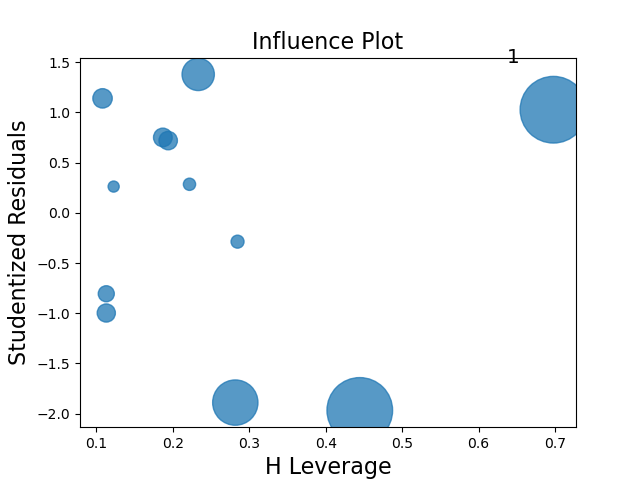

In [61]:
fig=sm.graphics.influence_plot(results1,criterion='cooks')

In [62]:
#influence=results1.get_influence()
#influence.summary_frame()

# Closed form solution to OLS regression

We can find the coefficients that fit this model through the solutions to the closed form solution of minimizing the sum of the squared error terms. 

Fit the multiple linear regression model

y = $\beta$<sub>0</sub> + $\beta$<sub>1</sub>x<sub>1</sub> + $\beta$<sub>2</sub>x<sub>2</sub> + $\epsilon$

We will do this through using the normal equations that are found using calculus (minimizing the squares of the residuals by partial differentiation and setting these equal to 0).  There will be one more than the number of predictors; one for each of the unknown regression coefficients.  The solution to the normal equations will be the estimators of the regression coefficients beta, beta1, and beta2.  

Will have 3 equations and 3 unknowns

n$\beta$<sub>0</sub> + $\sum$x<sub>i1</sub> $\beta$<sub>1</sub> + $\sum$x<sub>i2</sub> $\beta$<sub>2</sub> = $\sum$y<sub>i</sub> 

$\sum$x<sub>i1</sub> $\beta$<sub>0</sub> + $\sum$x<sup>2</sup><sub>i1</sub> $\beta$<sub>1</sub> + $\sum$x<sub>i1</sub>x<sub>i2</sub> $\beta$<sub>2</sub> = $\sum$x<sub>i1</sub>y<sub>i</sub> 

$\sum$x<sub>i2</sub> $\beta$<sub>0</sub> + $\sum$x<sub>i1</sub>x<sub>i2</sub> $\beta$<sub>1</sub> + $\sum$x<sup>2</sup><sub>i2</sub> $\beta$<sub>2</sub>= $\sum$x<sub>i2</sub>y<sub>i</sub>

Solve for this to find the beta coefficients, so the fitted regression equations is:

$\hat{y}$ = $\beta$<sub>0</sub> + $\beta$<sub>1</sub> x<sub>1</sub> + $\beta$<sub>2</sub> x<sub>2</sub>

Calculate the summary stats needed in the set of linear equations to solve the normal equations.

In [80]:
X1=np.array(power["AmbTemp"])
X2=np.array(power["RunDays"])
y=np.array(power["PowerCons"])

In [81]:
np.sum(X1)

685

In [82]:
np.sum(X2)

292

In [83]:
np.sum(y)

3325

In [84]:
np.sum(np.square(X1))

43245

In [85]:
np.sum(np.square(X2))

7124

In [86]:
np.sum(X1*X2)

16852

In [87]:
np.sum(X1*y)

193990

In [88]:
np.sum(X2*y)

81198

Will have 3 equations and 3 unknowns

12$\beta$<sub>0</sub> + 685$\beta$<sub>1</sub> + 292$\beta$<sub>2</sub> = 3325 

685$\beta$<sub>0</sub> + 43245$\beta$<sub>1</sub> + 16852$\beta$<sub>2</sub> = 193990  

292$\beta$<sub>0</sub> + 16852$\beta$<sub>1</sub> + 7124$\beta$<sub>2</sub> = 81198

Solve for this to find the beta coefficients, so the fitted regression equations is:

$\hat{y}$ = 3.9164 + 0.5727x<sub>1</sub> + 9.8824x<sub>2</sub>

# Matrix formulation

We can also use the matrix formulation of the above.  The model is a system of 3 equations that are expressed in matrix notation as:

**y = X$\beta$ + $\epsilon$**

The normal equations in matrix form:  **X$'$X$\hat{\beta}$ = X$'$y**

solve for $\hat{\beta}$, the vector of the regression coefficients

$\hat{\beta}$ = **(X$'$X)<sup>-1</sup>X$'$y**

we will mean center both the predictors and the response so that we have a 0 y-intercept value.

In [89]:
X1=np.array(power["AmbTemp"])
X2=np.array(power["RunDays"])
y=np.array(power["PowerCons"])

In [90]:
X1M=X1-np.mean(X1)
X2M=X2-np.mean(X2)
yM=y-np.mean(y)

In [91]:
# add columns of 1 so that you can fit an intercept term
X_biasM=np.ones((12,1)) # m is the number of records in the dataset

In [92]:
X1M=np.reshape(X1M,(12,1))
X2M=np.reshape(X2M,(12,1))
yM=np.reshape(yM,(12,1))

In [93]:
newXM=np.append(X_biasM,X1M,axis=1)
newXM=np.append(newXM,X2M,axis=1)
newXM

array([[  1.        , -32.08333333,  -0.33333333],
       [  1.        , -26.08333333,  -3.33333333],
       [  1.        , -12.08333333,  -0.33333333],
       [  1.        ,   2.91666667,   0.66666667],
       [  1.        ,   7.91666667,   0.66666667],
       [  1.        ,  14.91666667,   1.66666667],
       [  1.        ,  22.91666667,   0.66666667],
       [  1.        ,  26.91666667,   0.66666667],
       [  1.        ,  17.91666667,  -0.33333333],
       [  1.        ,   2.91666667,   0.66666667],
       [  1.        ,  -7.08333333,   0.66666667],
       [  1.        , -19.08333333,  -1.33333333]])

In [94]:
X_transposeM=np.transpose(newXM)

In [95]:
XtYM=((X_transposeM.dot(yM)))
XtYM

array([[2.27373675e-13],
       [4.18791667e+03],
       [2.89666667e+02]])

In [96]:
XtXM=((X_transposeM.dot(newXM)))
XtXM

array([[ 1.20000000e+01, -2.84217094e-14,  1.42108547e-14],
       [-2.84217094e-14,  4.14291667e+03,  1.83666667e+02],
       [ 1.42108547e-14,  1.83666667e+02,  1.86666667e+01]])

In [97]:
XtX_InverseM=np.linalg.inv(XtXM)
XtX_InverseM

array([[ 8.33333333e-02,  6.00253605e-18, -1.22501983e-16],
       [ 6.00253605e-18,  4.28124737e-04, -4.21244161e-03],
       [-1.22501983e-16, -4.21244161e-03,  9.50188451e-02]])

In [98]:
beta_matrixM=XtX_InverseM.dot(XtYM)
beta_matrixM

array([[8.60118601e-15],
       [5.72746802e-01],
       [9.88243771e+00]])

In [2]:
# final dot product for b1
(4.18791667e+03*4.28124737e-04)+(2.89666667e+02*-4.21244161e-03)

0.5727468018208515

In [3]:
# final dot product for b2
(4.18791667e+03*-4.21244161e-03)+(2.89666667e+02*9.50188451e-02)

9.882437722385646

# What is the MSE and standard error of the regression?

Can use **e$'$e** = $\sum$ **e<sup>2</sup>** = $\sum$**(y-$\hat{y}$)<sup>2</sup>** = $\sum$**(y-X$\beta$)<sup>2</sup>** for sum of the squares of the residuals

In [118]:
SSRes=np.transpose(yM-newXM.dot(beta_matrixM)).dot(yM-newXM.dot(beta_matrixM))
SSRes

array([[1311.68799645]])

In [119]:
SSRes=np.sum(np.square(results1.resid))
SSRes

1311.6879964526815

In [120]:
MSE= np.sum(np.square(results1.resid)) / (12-3)
MSE

145.74311071696462

# What is the F statistic?

In [114]:
SSTot=(np.transpose(yM)).dot(yM)
SSTot

array([[6572.91666667]])

In [115]:
np.sum(np.square(yM))

6572.916666666666

In [121]:
SSReg= SSTot-SSRes
SSReg

array([[5261.22867021]])

In [124]:
MS_Reg= SSReg/2

In [126]:
Fstat=MS_Reg/MSE
Fstat

array([[18.04966507]])

# What is the standard error of a coefficient b?

The diagonal of the XtX_Inverse matrix is holding the inverse of the sum of squares for each X component.  

The square root of the (MSE multiplied by the diagonal of the XtX_Inverse matrix) is the standard error of the coefficient.

In [129]:
# standard error for X1
np.sqrt(4.28124737e-04 * MSE)

0.2497923756748039

In [130]:
# standard error for X2
np.sqrt(9.50188451e-02 * MSE)

3.721336058676697

# What is the t statistic of coefficeint b?

In [136]:
results1.params

Intercept    3.916386
AmbTemp      0.572747
RunDays      9.882438
dtype: float64

In [140]:
# t for b1
results1.params/(np.sqrt(4.28124737e-04 * MSE))

Intercept    15.678564
AmbTemp       2.292891
RunDays      39.562607
dtype: float64

# What is R-Squared?

Finding R-squared

1 - [ $\sum$ **e<sup>2</sup>** / $\sum$**(y-$\bar{y}$)<sup>2</sup>** ] = 1 - [**e$'$e / y$'$y**]

In [141]:
SSTot=(np.transpose(yM)).dot(yM)
SSTot

array([[6572.91666667]])

In [142]:
np.sum(np.square(yM))

6572.916666666666

In [143]:
1 - SSRes/SSTot

array([[0.80044049]])

In [144]:
# R-squared adj = 1 - (n-1/SSTot)*MSE
1-((11/SSTot)*MSE)

array([[0.75609394]])

#  OLS model with mean centered values

In [145]:
X1A=X1-np.mean(X1)
X2A=X2-np.mean(X2)
yA=y-np.mean(y)

In [147]:
model2=ols('yA~X1A+X2A',data=power)
results2=model2.fit()
print(results2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.756   
Dependent Variable: yA               AIC:                96.3845 
Date:               2023-03-16 10:59 BIC:                97.8392 
No. Observations:   12               Log-Likelihood:     -45.192 
Df Model:           2                F-statistic:        18.05   
Df Residuals:       9                Prob (F-statistic): 0.000708
R-squared:          0.800            Scale:              145.74  
-------------------------------------------------------------------
            Coef.    Std.Err.     t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
Intercept   0.0000     3.4850   0.0000   1.0000   -7.8836    7.8836
X1A         0.5727     0.2498   2.2929   0.0475    0.0077    1.1378
X2A         9.8824     3.7213   2.6556   0.0262    1.4642   18.3007
-----------------------------------------------------------------
Omnibus:       

C:\Users\carol\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
